<a href="https://colab.research.google.com/github/sirinezaibi1234/FreelanceHub/blob/main/model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings, json, joblib, os, time
from datetime import datetime

In [ ]:
df_logs=pd.read_csv('logs.csv')
df_rh=pd.read_csv('employee.csv',
    sep="\t")
df_machines=pd.read_csv('machines.csv' , sep=";")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def EDA(data):
    print("📌 Dimensions du dataset :", data.shape)
    print("\n🔍 Aperçu des 5 premières lignes :")
    display(data.head())

    print("\n📊 Statistiques descriptives :")
    display(data.describe(include='all'))

    print("\n🧱 Informations générales :")
    data.info()

    print("\n❓ Valeurs manquantes par colonne :")
    print(data.isnull().sum())

    print("\n🌀 Lignes dupliquées :", data.duplicated().sum())

    print("\n🔢 Types de colonnes :")
    print(data.dtypes.value_counts())

    print("\n📈 Corrélation (numériques seulement) :")
    corr = data.select_dtypes(include='number').corr()
    plt.figure(figsize=(10,6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Matrice de corrélation")
    plt.show()

    print("\n📊 Distribution des colonnes numériques :")
    numeric_cols = data.select_dtypes(include='number').columns
    data[numeric_cols].hist(figsize=(15, 10), bins=30)
    plt.tight_layout()
    plt.show()


📌 Dimensions du dataset : (159628, 11)

🔍 Aperçu des 5 premières lignes :


,log_id,employee_id,machine_id,task_name,tag_event_start,tag_event_end,task_duration_min,shift,product,task_status,anomaly_flag
0,L000001,E005,M001,Decoupe lot complet,2025-01-01 06:11:00,2025-01-01 10:25:18,254.3,Matin,T-Shirt_Sport,Completee,0
1,L000002,E021,M001,Decoupe lot complet,2025-01-01 06:08:00,2025-01-01 10:07:54,239.9,Matin,Chemise_Formelle,Completee,0
2,L000003,E047,M001,Decoupe lot complet,2025-01-01 06:02:00,2025-01-01 08:22:54,140.9,Matin,Chemise_Formelle,Completee,1
3,L000004,E047,M001,Decoupe lot complet,2025-01-01 08:27:54,2025-01-01 12:01:24,213.5,Matin,Chemise_Formelle,Completee,0
4,L000005,E036,M001,Decoupe lot complet,2025-01-01 06:12:00,2025-01-01 09:08:30,176.5,Matin,Polo_Premium,Completee,0



📊 Statistiques descriptives :


,log_id,employee_id,machine_id,task_name,tag_event_start,tag_event_end,task_duration_min,shift,product,task_status,anomaly_flag
count,159628,159628,159628,159628,159628,159628,159628.000000,159628,159628,159628,159628.000000
unique,159628,500,10,10,103854,137526,NaN,3,5,2,NaN
top,L159628,E387,M008,Repassage final,2025-01-08 14:13:00,2025-02-08 07:45:00,NaN,ApresMidi,Sweat_Logo,Completee,NaN
freq,1,461,29591,29591,37,6,NaN,68363,32101,157852,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,88.455765,NaN,NaN,NaN,0.048137
std,NaN,NaN,NaN,NaN,NaN,NaN,44.347973,NaN,NaN,NaN,0.214056
min,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,65.100000,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,81.800000,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,100.400000,NaN,NaN,NaN,0.000000



🧱 Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159628 entries, 0 to 159627
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   log_id             159628 non-null  object 
 1   employee_id        159628 non-null  object 
 2   machine_id         159628 non-null  object 
 3   task_name          159628 non-null  object 
 4   tag_event_start    159628 non-null  object 
 5   tag_event_end      159628 non-null  object 
 6   task_duration_min  159628 non-null  float64
 7   shift              159628 non-null  object 
 8   product            159628 non-null  object 
 9   task_status        159628 non-null  object 
 10  anomaly_flag       159628 non-null  int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 13.4+ MB

❓ Valeurs manquantes par colonne :
log_id               0
employee_id          0
machine_id           0
task_name            0
tag_event_start      0
tag_event_

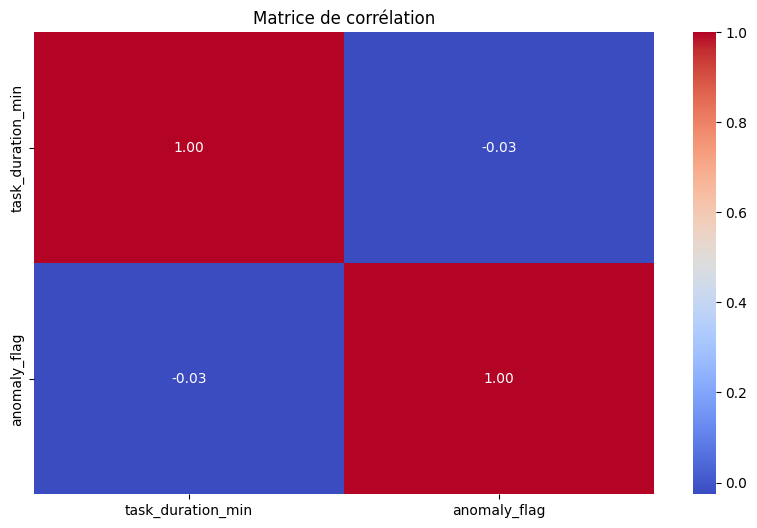


📊 Distribution des colonnes numériques :


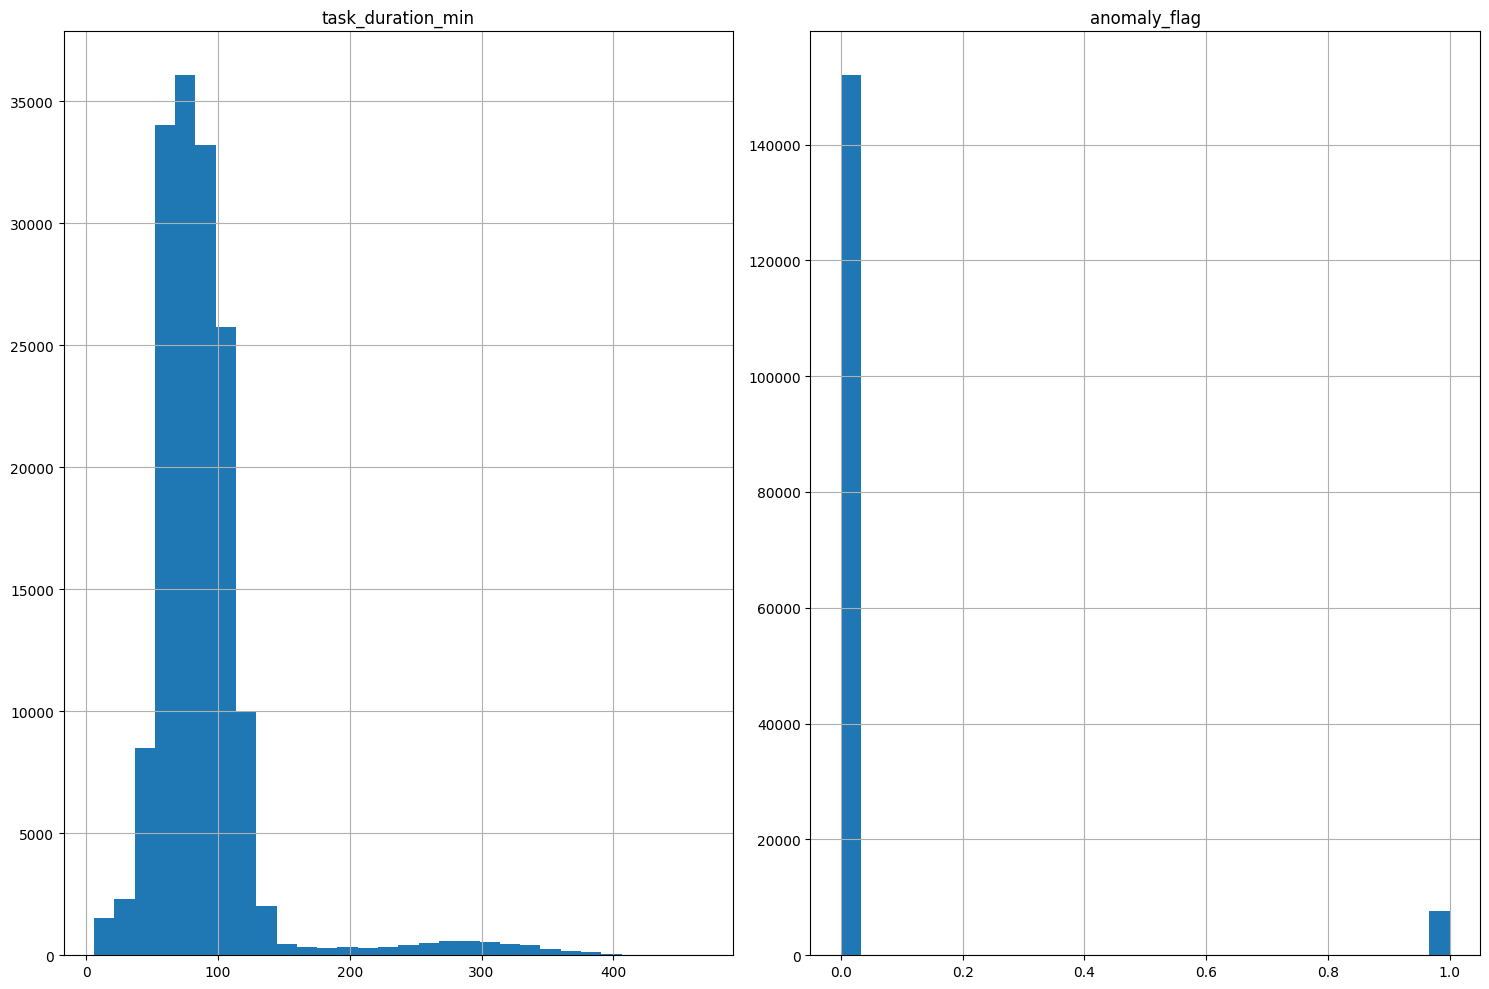

📌 Dimensions du dataset : (500, 30)

🔍 Aperçu des 5 premières lignes :


,employee_id,nom,prenom,sexe,date_naissance,age,etat_civil,nombre_enfants,niveau_etude,poste,...,rfid_uid,shift_travail,performance_moyenne,taux_rendement,accidents_travail,maladies_professionnelles,evaluation_manager,risque_absenteisme,risque_depart,date_embauche
0,E001,BenSalah,Ali,H,1983-04-16,43,Celibataire,0,Bac,Operateur couture,...,RFID00000001,Nuit,"0,39","0,62",4,1,2,Eleve,Eleve,2018-07-12
1,E002,Cherni,Anis,H,1992-09-28,34,Divorce,0,Aucun,Controle qualite,...,RFID00000002,Jour,"0,48","0,77",1,0,3,Eleve,Eleve,2025-03-10
2,E003,Sassi,Hatem,H,1973-05-06,53,Celibataire,0,Primaire,Operateur couture,...,RFID00000003,Jour,"0,87","1,39",2,1,5,Moyen,Faible,2022-03-07
3,E004,Zouari,Youssef,H,1967-08-11,59,Celibataire,0,Licence,Operateur coupe,...,RFID00000004,Nuit,"0,79","1,26",0,1,2,Eleve,Faible,2020-07-11
4,E005,Ayadi,Sami,H,2000-05-05,26,Marie,5,Primaire,Operateur couture,...,RFID00000005,Rotation,"0,4","0,64",5,0,3,Moyen,Eleve,2022-04-19



📊 Statistiques descriptives :


,employee_id,nom,prenom,sexe,date_naissance,age,etat_civil,nombre_enfants,niveau_etude,poste,...,rfid_uid,shift_travail,performance_moyenne,taux_rendement,accidents_travail,maladies_professionnelles,evaluation_manager,risque_absenteisme,risque_depart,date_embauche
count,500,500,500,500,500,500.000000,500,500.000000,500,500,...,500,500,500,500,500.000000,500.000000,500.00000,500,500,500
unique,500,20,20,2,491,NaN,3,NaN,6,5,...,500,3,64,60,NaN,NaN,NaN,3,3,486
top,E500,Chakroun,Anis,H,1999-11-01,NaN,Celibataire,NaN,Primaire,Operateur couture,...,RFID00000500,Nuit,"0,88","1,5",NaN,NaN,NaN,Eleve,Faible,2023-01-14
freq,1,40,32,250,2,NaN,239,NaN,113,108,...,1,180,15,32,NaN,NaN,NaN,251,232,3
mean,NaN,NaN,NaN,NaN,NaN,42.126000,NaN,1.220000,NaN,NaN,...,NaN,NaN,NaN,NaN,2.434000,0.504000,2.86800,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,11.548891,NaN,1.738287,NaN,NaN,...,NaN,NaN,NaN,NaN,1.756078,0.500485,1.38362,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,23.000000,NaN,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,0.000000,1.00000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,32.000000,NaN,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,0.000000,2.00000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,43.000000,NaN,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,2.000000,1.000000,3.00000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,53.000000,NaN,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,4.000000,1.000000,4.00000,NaN,NaN,NaN



🧱 Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   employee_id                500 non-null    object
 1   nom                        500 non-null    object
 2   prenom                     500 non-null    object
 3   sexe                       500 non-null    object
 4   date_naissance             500 non-null    object
 5   age                        500 non-null    int64 
 6   etat_civil                 500 non-null    object
 7   nombre_enfants             500 non-null    int64 
 8   niveau_etude               500 non-null    object
 9   poste                      500 non-null    object
 10  departement                500 non-null    object
 11  type_contrat               500 non-null    object
 12  anciennete_annees          500 non-null    int64 
 13  salaire_mensuel            500 non-nu

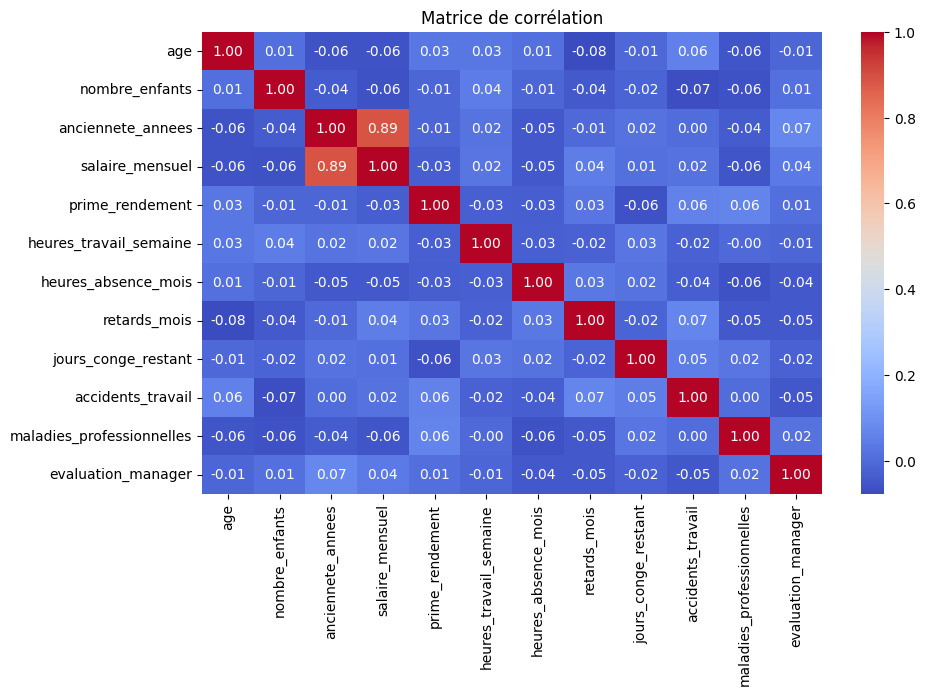


📊 Distribution des colonnes numériques :


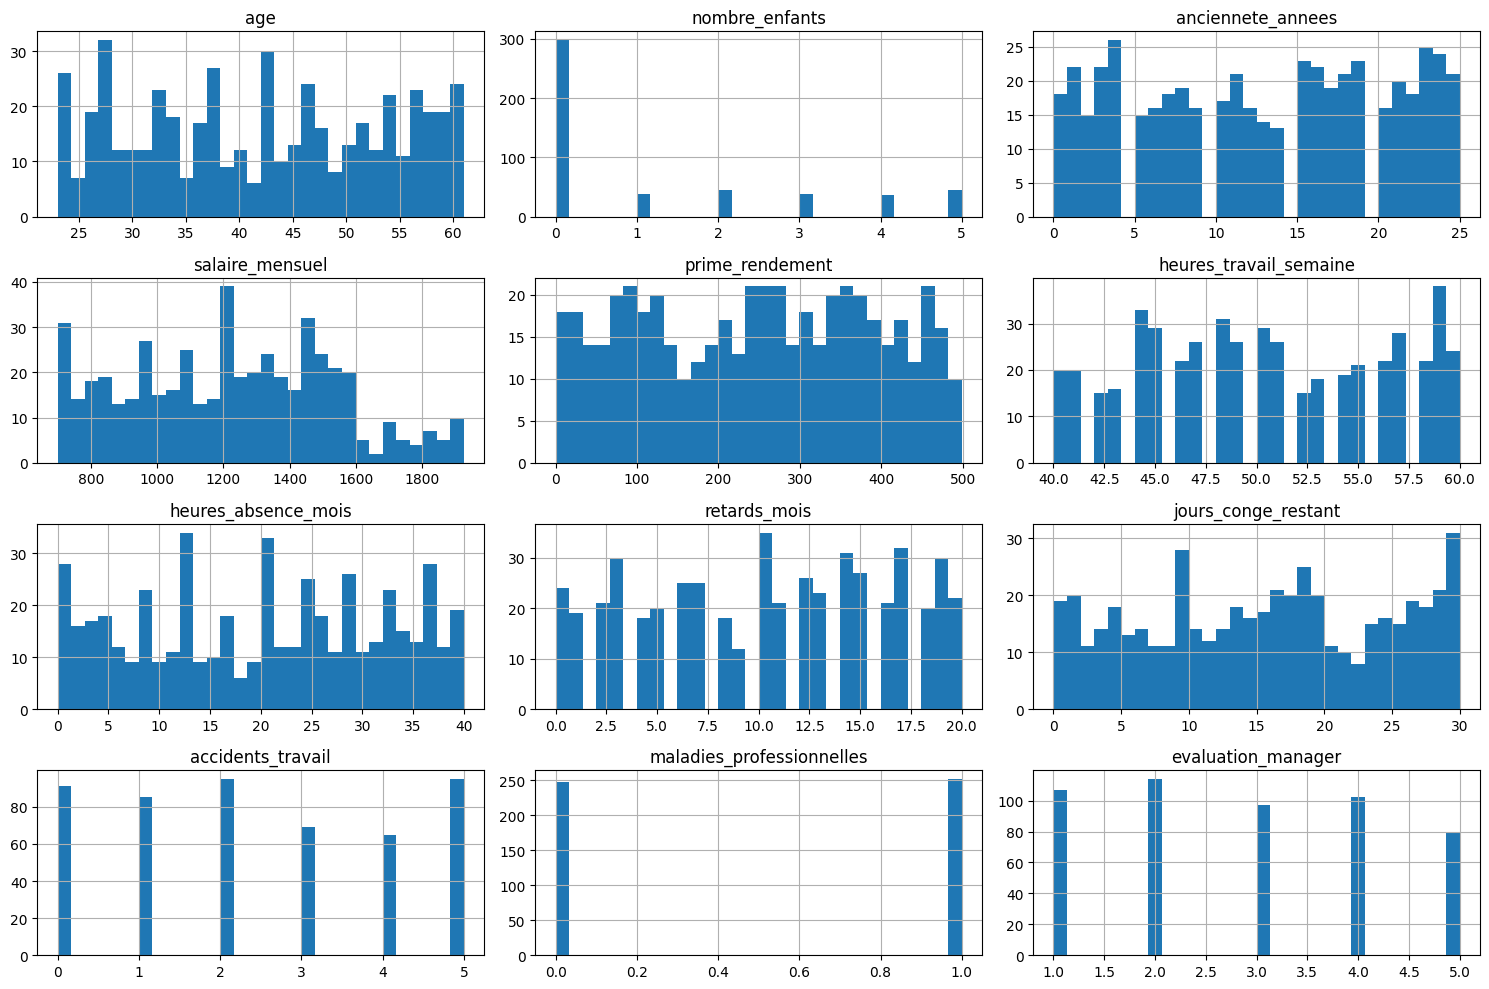

📌 Dimensions du dataset : (10, 16)

🔍 Aperçu des 5 premières lignes :


,machine_id,nom_machine,type_machine,atelier,tache,unite_production,capacite,temps_par_unite_min,temps_total_tache_min,operateurs_requis,pannes_mois,etat_machine,annee_installation,marque,consommation_energie,rendement_machine
0,M001,Decoupe automatique tissu,Decoupe,Preparation,"Decoupe lot complet (devant,dos,manches)",Lot,500,"0,6",300,2,1,Actif,2019,Lectra,Elevee,"0,92"
1,M002,Surjeteuse assemblage epaules,Couture,Assemblage,Assemblage epaules,Piece,120,"0,8",96,1,2,Actif,2018,JUKI,Moyen,"0,88"
2,M003,Piqueuse assemblage manches,Couture,Assemblage,Assemblage manches,Piece,100,1,100,1,2,Actif,2017,JUKI,Moyen,"0,85"
3,M004,Piqueuse fermeture laterale,Couture,Assemblage,Fermeture laterale corps,Piece,110,"0,9",99,1,3,Actif,2016,Brother,Moyen,"0,83"
4,M005,Machine pose col,Couture,Assemblage,Pose col,Piece,90,"1,2",108,1,2,Actif,2019,JUKI,Moyen,"0,87"



📊 Statistiques descriptives :


,machine_id,nom_machine,type_machine,atelier,tache,unite_production,capacite,temps_par_unite_min,temps_total_tache_min,operateurs_requis,pannes_mois,etat_machine,annee_installation,marque,consommation_energie,rendement_machine
count,10,10,10,10,10,10,10.000000,10,10.000000,10.000000,10.000000,10,10.000000,10,10,10
unique,10,10,7,5,10,2,NaN,10,NaN,NaN,NaN,1,NaN,7,3,10
top,M001,Decoupe automatique tissu,Couture,Assemblage,"Decoupe lot complet (devant,dos,manches)",Piece,NaN,"0,6",NaN,NaN,NaN,Actif,NaN,JUKI,Moyen,"0,92"
freq,1,1,4,4,1,9,NaN,1,NaN,NaN,NaN,10,NaN,3,4,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,165.000000,NaN,108.900000,1.100000,1.400000,NaN,2018.500000,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,131.592806,NaN,69.110941,0.316228,0.966092,NaN,2.173067,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,NaN,60.000000,1.000000,0.000000,NaN,2015.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,92.500000,NaN,78.750000,1.000000,1.000000,NaN,2017.250000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,115.000000,NaN,97.000000,1.000000,1.500000,NaN,2018.500000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,187.500000,NaN,99.750000,1.000000,2.000000,NaN,2019.750000,NaN,NaN,NaN



🧱 Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   machine_id             10 non-null     object
 1   nom_machine            10 non-null     object
 2   type_machine           10 non-null     object
 3   atelier                10 non-null     object
 4   tache                  10 non-null     object
 5   unite_production       10 non-null     object
 6   capacite               10 non-null     int64 
 7   temps_par_unite_min    10 non-null     object
 8   temps_total_tache_min  10 non-null     int64 
 9   operateurs_requis      10 non-null     int64 
 10  pannes_mois            10 non-null     int64 
 11  etat_machine           10 non-null     object
 12  annee_installation     10 non-null     int64 
 13  marque                 10 non-null     object
 14  consommation_energie   10 non-null     object
 15

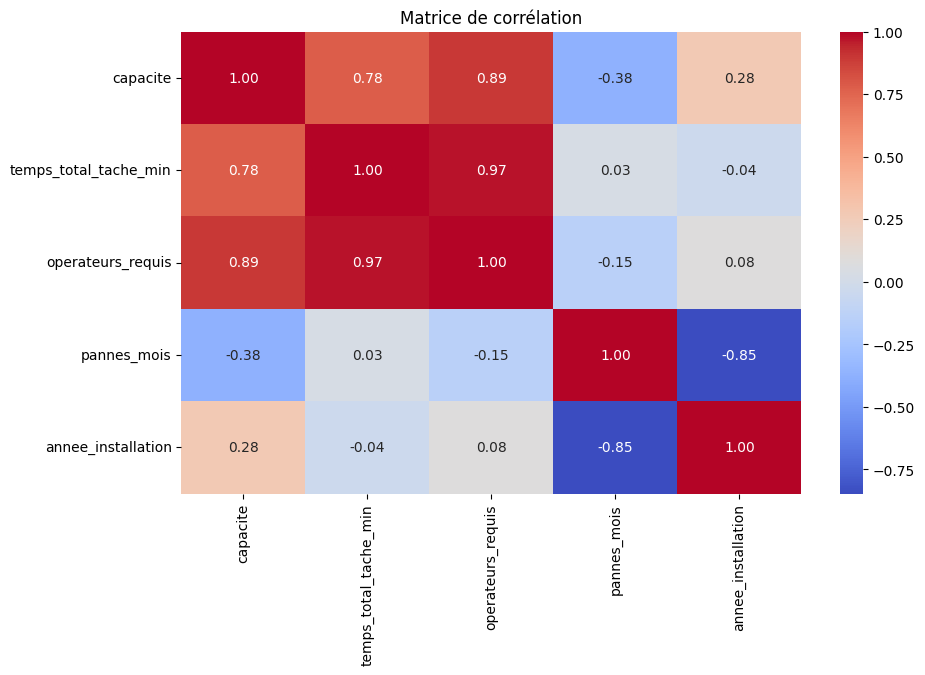


📊 Distribution des colonnes numériques :


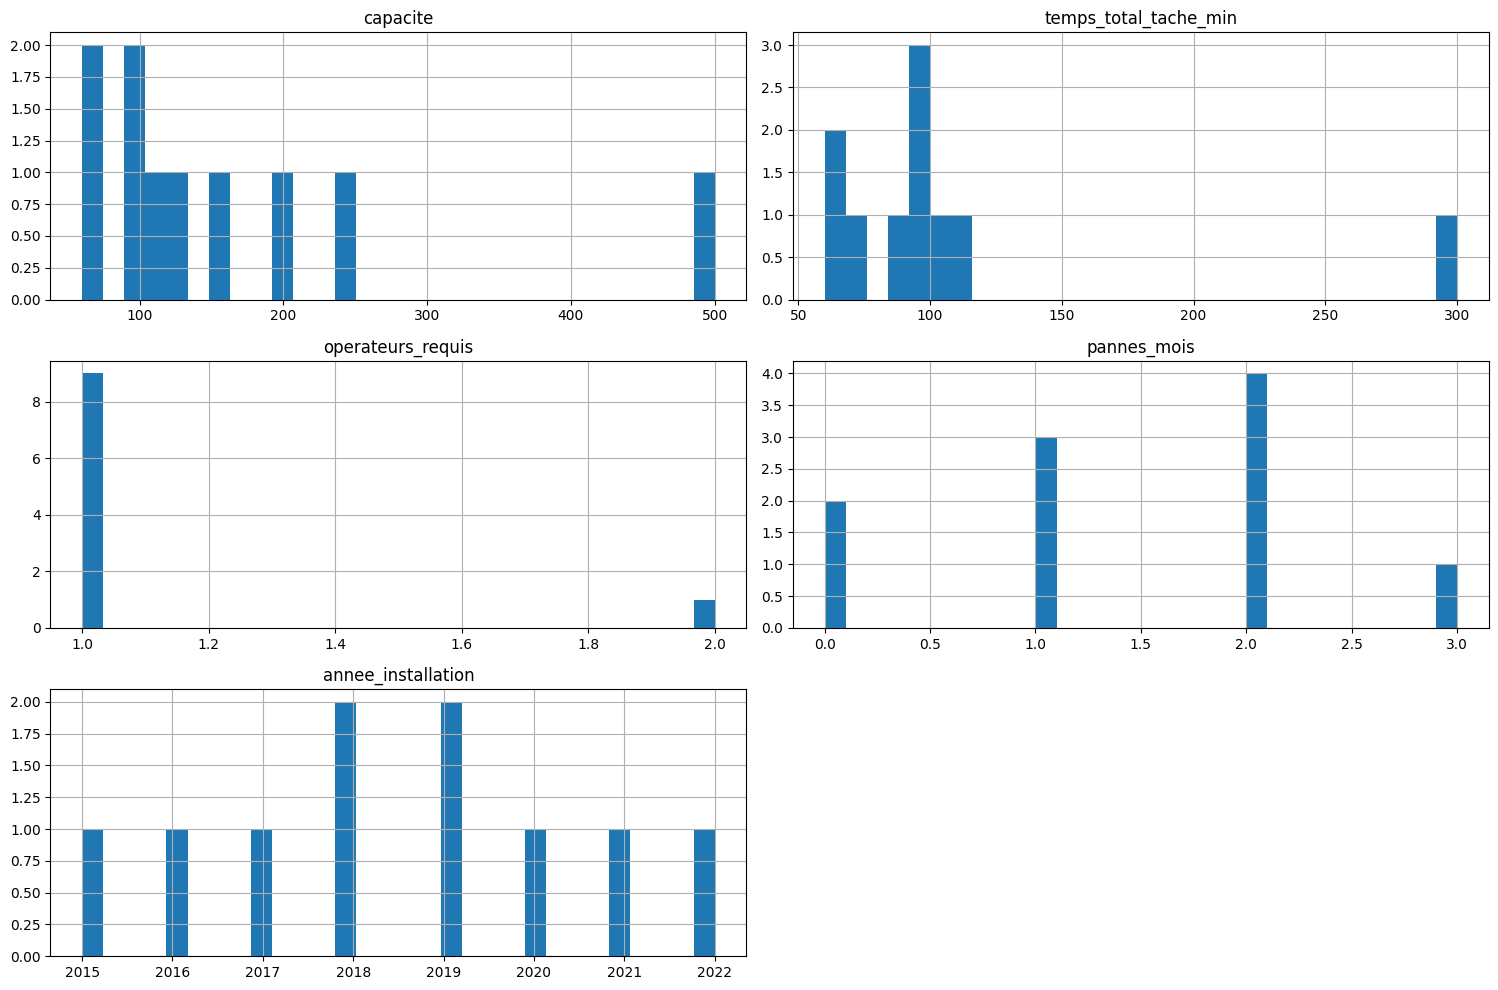

In [ ]:
EDA(df_logs)
EDA(df_rh)
EDA(df_machines)

In [ ]:
import pandas as pd

# --- Fonction simple pour convertir les virgules décimales ---
def fix_decimal(df):
    for col in df.select_dtypes(include="object").columns:
        df[col] = df[col].str.replace(',', '.', regex=False)
        df[col] = pd.to_numeric(df[col], errors='ignore')
    return df

print("🔧 Nettoyage...")

# Nettoyage général
df_logs     = fix_decimal(df_logs)
df_rh       = fix_decimal(df_rh)
df_machines = fix_decimal(df_machines)

# --- Conversions spécifiques Logs ---
df_logs['tag_event_start'] = pd.to_datetime(df_logs['tag_event_start'], errors='coerce')
df_logs['tag_event_end']   = pd.to_datetime(df_logs['tag_event_end'], errors='coerce')
df_logs['anomaly_flag']    = df_logs['anomaly_flag'].fillna(0).astype(int)

# --- Résumé rapide ---
print("\n✅ Nettoyage terminé")
print(f"Logs : {len(df_logs):,} lignes")
print(f"Anomalies : {df_logs['anomaly_flag'].mean()*100:.2f}%")
print(f"Employés : {len(df_rh)}")
print(f"Machines : {len(df_machines)}")

🔧 Nettoyage...


/tmp/ipython-input-627181763.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
/tmp/ipython-input-627181763.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
/tmp/ipython-input-627181763.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')



✅ Nettoyage terminé
Logs : 159,628 lignes
Anomalies : 4.81%
Employés : 500
Machines : 10


📌 Dimensions du dataset : (159628, 11)

🔍 Aperçu des 5 premières lignes :


,log_id,employee_id,machine_id,task_name,tag_event_start,tag_event_end,task_duration_min,shift,product,task_status,anomaly_flag
0,L000001,E005,M001,Decoupe lot complet,2025-01-01 06:11:00,2025-01-01 10:25:18,254.3,Matin,T-Shirt_Sport,Completee,0
1,L000002,E021,M001,Decoupe lot complet,2025-01-01 06:08:00,2025-01-01 10:07:54,239.9,Matin,Chemise_Formelle,Completee,0
2,L000003,E047,M001,Decoupe lot complet,2025-01-01 06:02:00,2025-01-01 08:22:54,140.9,Matin,Chemise_Formelle,Completee,1
3,L000004,E047,M001,Decoupe lot complet,2025-01-01 08:27:54,2025-01-01 12:01:24,213.5,Matin,Chemise_Formelle,Completee,0
4,L000005,E036,M001,Decoupe lot complet,2025-01-01 06:12:00,2025-01-01 09:08:30,176.5,Matin,Polo_Premium,Completee,0



📊 Statistiques descriptives :


,log_id,employee_id,machine_id,task_name,tag_event_start,tag_event_end,task_duration_min,shift,product,task_status,anomaly_flag
count,159628,159628,159628,159628,159628,159628,159628.000000,159628,159628,159628,159628.000000
unique,159628,500,10,10,NaN,NaN,NaN,3,5,2,NaN
top,L159628,E387,M008,Repassage final,NaN,NaN,NaN,ApresMidi,Sweat_Logo,Completee,NaN
freq,1,461,29591,29591,NaN,NaN,NaN,68363,32101,157852,NaN
mean,NaN,NaN,NaN,NaN,2025-01-30 15:05:10.830205184,2025-01-30 16:33:38.176121600,88.455765,NaN,NaN,NaN,0.048137
min,NaN,NaN,NaN,NaN,2025-01-01 06:00:00,2025-01-01 06:24:06,6.000000,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,2025-01-15 17:30:03,2025-01-15 18:57:36,65.100000,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,2025-01-30 14:02:00,2025-01-30 15:06:45,81.800000,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,2025-02-14 08:53:01.500000,2025-02-14 10:21:36,100.400000,NaN,NaN,NaN,0.000000
max,NaN,NaN,NaN,NaN,2025-03-01 04:34:42,2025-03-01 05:59:54,467.800000,NaN,NaN,NaN,1.000000



🧱 Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159628 entries, 0 to 159627
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   log_id             159628 non-null  object        
 1   employee_id        159628 non-null  object        
 2   machine_id         159628 non-null  object        
 3   task_name          159628 non-null  object        
 4   tag_event_start    159628 non-null  datetime64[ns]
 5   tag_event_end      159628 non-null  datetime64[ns]
 6   task_duration_min  159628 non-null  float64       
 7   shift              159628 non-null  object        
 8   product            159628 non-null  object        
 9   task_status        159628 non-null  object        
 10  anomaly_flag       159628 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 13.4+ MB

❓ Valeurs manquantes par colonne :
log_id         

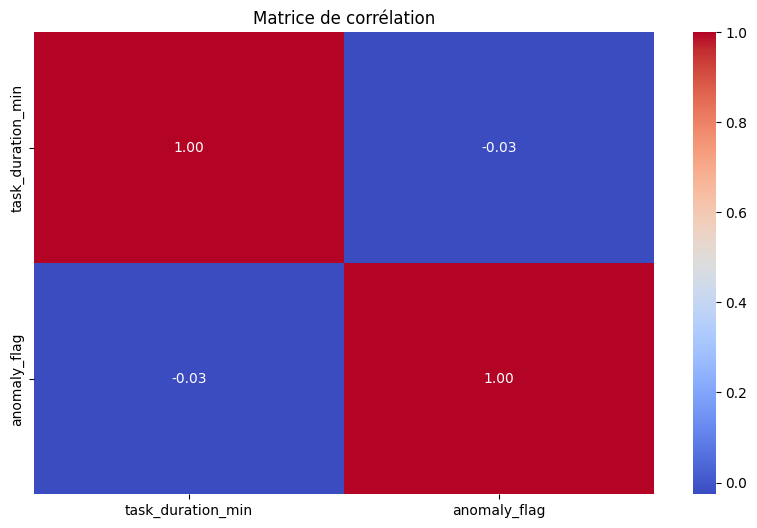


📊 Distribution des colonnes numériques :


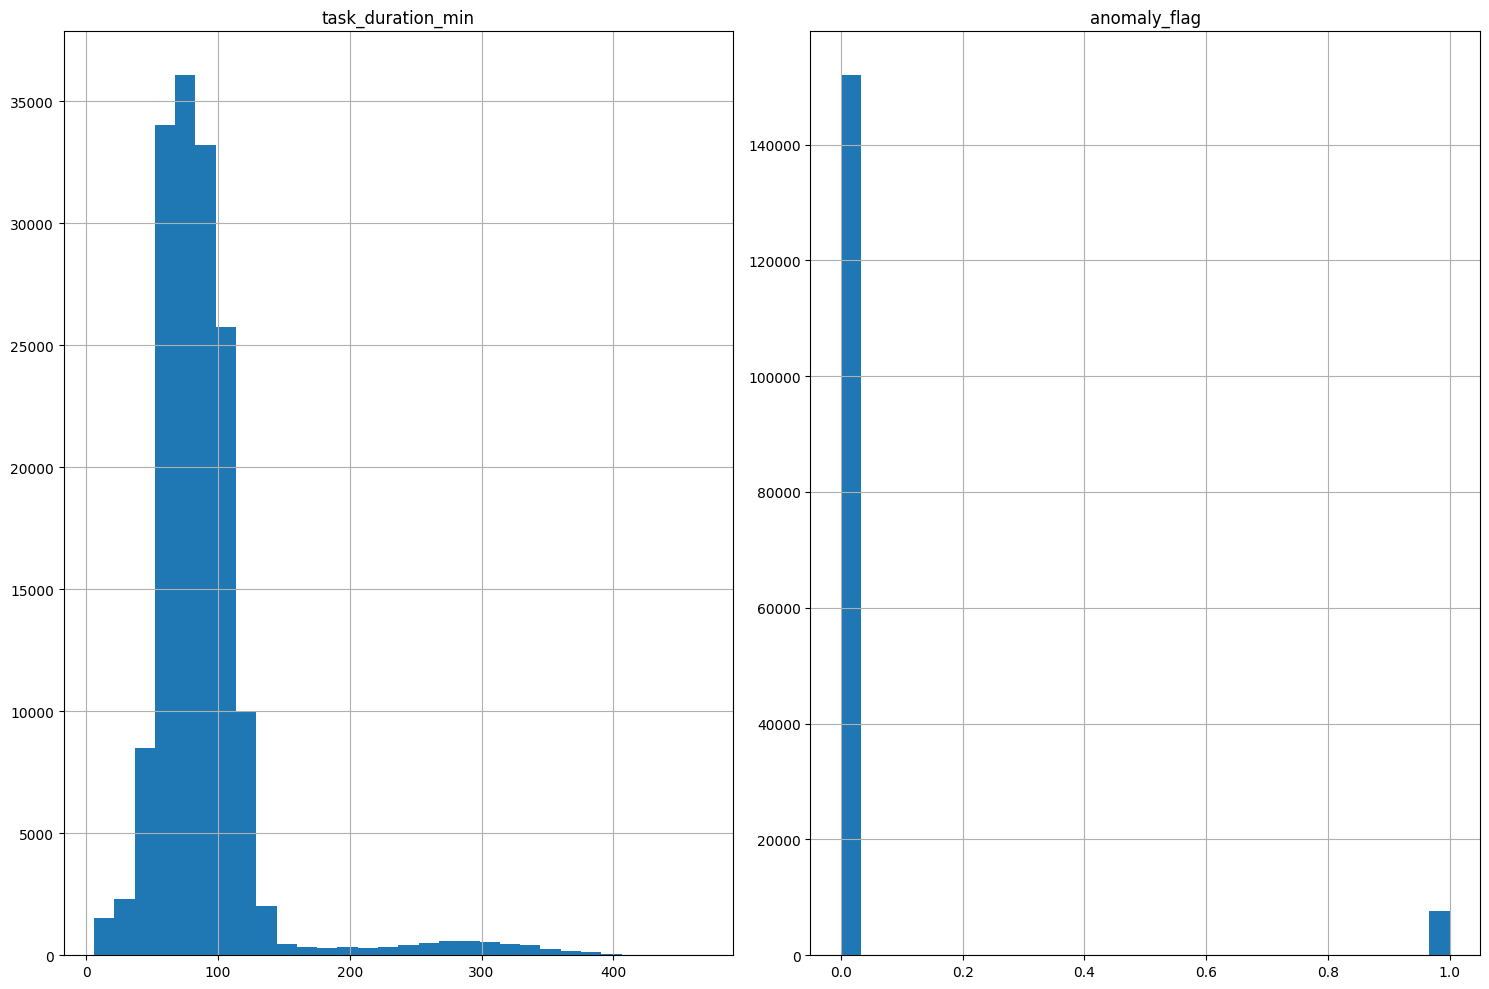

📌 Dimensions du dataset : (500, 30)

🔍 Aperçu des 5 premières lignes :


,employee_id,nom,prenom,sexe,date_naissance,age,etat_civil,nombre_enfants,niveau_etude,poste,...,rfid_uid,shift_travail,performance_moyenne,taux_rendement,accidents_travail,maladies_professionnelles,evaluation_manager,risque_absenteisme,risque_depart,date_embauche
0,E001,BenSalah,Ali,H,1983-04-16,43,Celibataire,0,Bac,Operateur couture,...,RFID00000001,Nuit,0.39,0.62,4,1,2,Eleve,Eleve,2018-07-12
1,E002,Cherni,Anis,H,1992-09-28,34,Divorce,0,Aucun,Controle qualite,...,RFID00000002,Jour,0.48,0.77,1,0,3,Eleve,Eleve,2025-03-10
2,E003,Sassi,Hatem,H,1973-05-06,53,Celibataire,0,Primaire,Operateur couture,...,RFID00000003,Jour,0.87,1.39,2,1,5,Moyen,Faible,2022-03-07
3,E004,Zouari,Youssef,H,1967-08-11,59,Celibataire,0,Licence,Operateur coupe,...,RFID00000004,Nuit,0.79,1.26,0,1,2,Eleve,Faible,2020-07-11
4,E005,Ayadi,Sami,H,2000-05-05,26,Marie,5,Primaire,Operateur couture,...,RFID00000005,Rotation,0.40,0.64,5,0,3,Moyen,Eleve,2022-04-19



📊 Statistiques descriptives :


,employee_id,nom,prenom,sexe,date_naissance,age,etat_civil,nombre_enfants,niveau_etude,poste,...,rfid_uid,shift_travail,performance_moyenne,taux_rendement,accidents_travail,maladies_professionnelles,evaluation_manager,risque_absenteisme,risque_depart,date_embauche
count,500,500,500,500,500,500.000000,500,500.000000,500,500,...,500,500,500.000000,500.000000,500.000000,500.000000,500.00000,500,500,500
unique,500,20,20,2,491,NaN,3,NaN,6,5,...,500,3,NaN,NaN,NaN,NaN,NaN,3,3,486
top,E500,Chakroun,Anis,H,1999-11-01,NaN,Celibataire,NaN,Primaire,Operateur couture,...,RFID00000500,Nuit,NaN,NaN,NaN,NaN,NaN,Eleve,Faible,2023-01-14
freq,1,40,32,250,2,NaN,239,NaN,113,108,...,1,180,NaN,NaN,NaN,NaN,NaN,251,232,3
mean,NaN,NaN,NaN,NaN,NaN,42.126000,NaN,1.220000,NaN,NaN,...,NaN,NaN,0.668360,1.067560,2.434000,0.504000,2.86800,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,11.548891,NaN,1.738287,NaN,NaN,...,NaN,NaN,0.180487,0.285527,1.756078,0.500485,1.38362,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,23.000000,NaN,0.000000,NaN,NaN,...,NaN,NaN,0.350000,0.560000,0.000000,0.000000,1.00000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,32.000000,NaN,0.000000,NaN,NaN,...,NaN,NaN,0.510000,0.820000,1.000000,0.000000,2.00000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,43.000000,NaN,0.000000,NaN,NaN,...,NaN,NaN,0.670000,1.070000,2.000000,1.000000,3.00000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,53.000000,NaN,2.000000,NaN,NaN,...,NaN,NaN,0.820000,1.310000,4.000000,1.000000,4.00000,NaN,NaN,NaN



🧱 Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   employee_id                500 non-null    object 
 1   nom                        500 non-null    object 
 2   prenom                     500 non-null    object 
 3   sexe                       500 non-null    object 
 4   date_naissance             500 non-null    object 
 5   age                        500 non-null    int64  
 6   etat_civil                 500 non-null    object 
 7   nombre_enfants             500 non-null    int64  
 8   niveau_etude               500 non-null    object 
 9   poste                      500 non-null    object 
 10  departement                500 non-null    object 
 11  type_contrat               500 non-null    object 
 12  anciennete_annees          500 non-null    int64  
 13  salaire_mensuel       

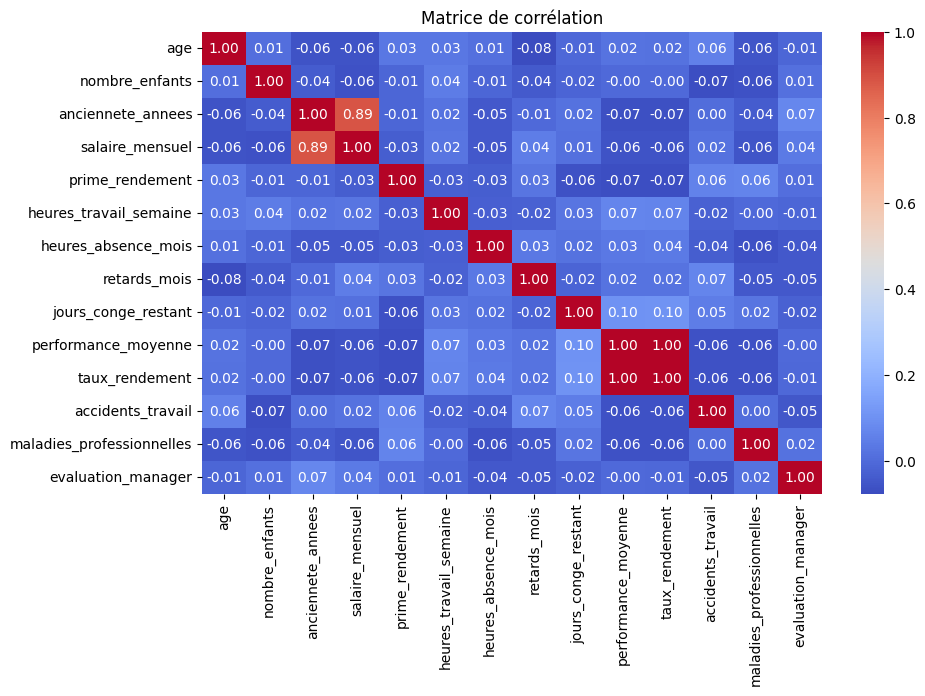


📊 Distribution des colonnes numériques :


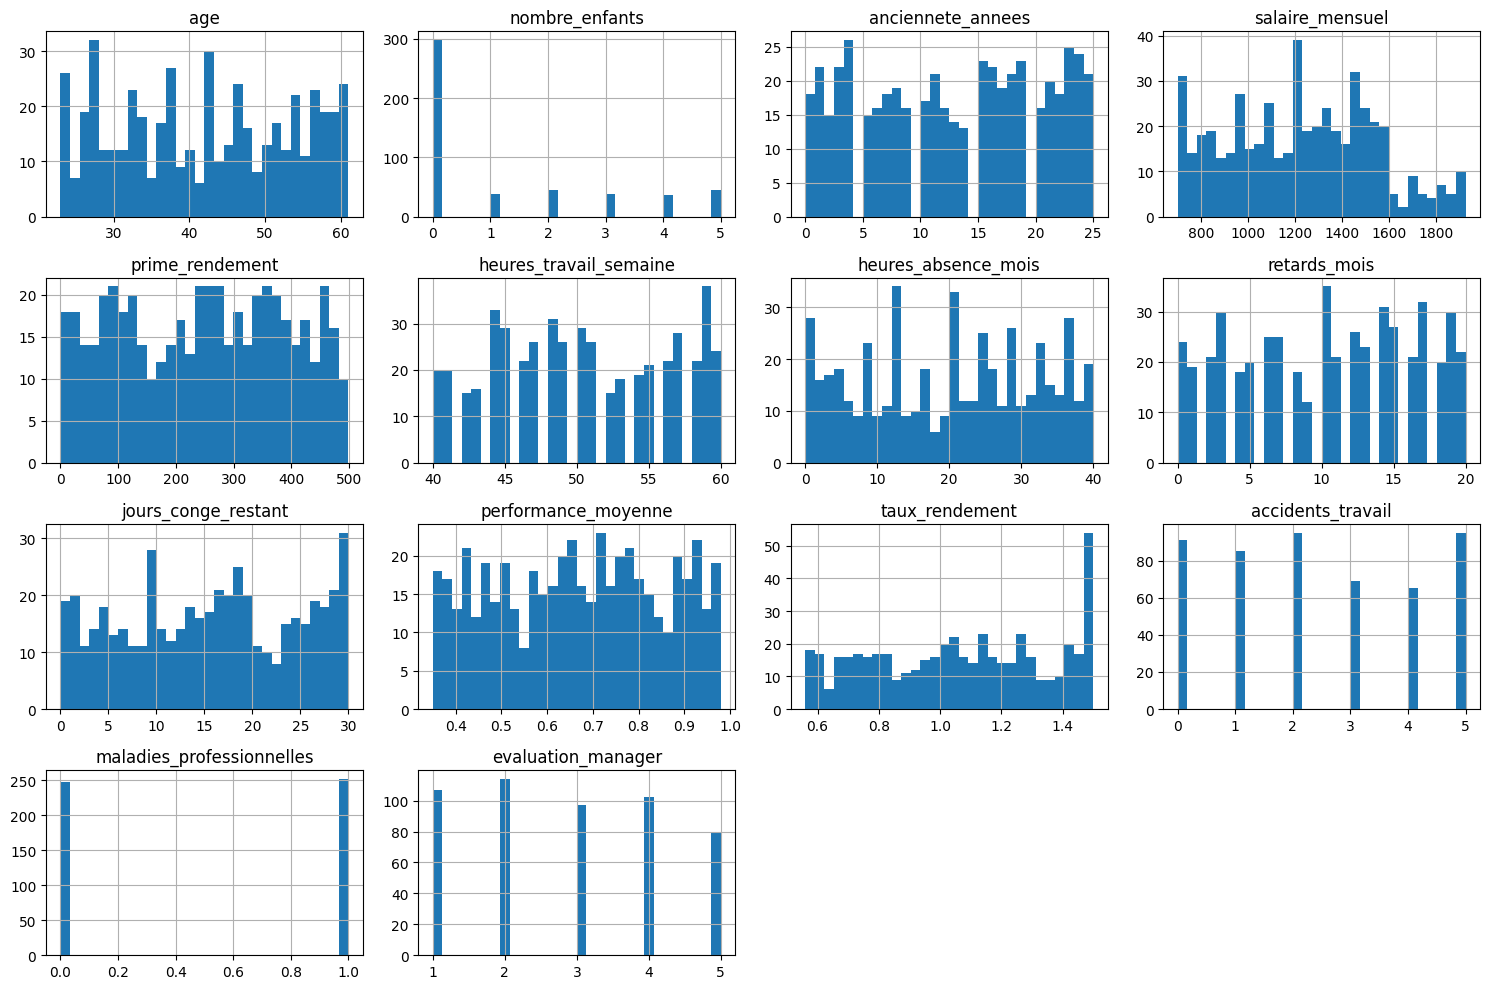

📌 Dimensions du dataset : (10, 16)

🔍 Aperçu des 5 premières lignes :


,machine_id,nom_machine,type_machine,atelier,tache,unite_production,capacite,temps_par_unite_min,temps_total_tache_min,operateurs_requis,pannes_mois,etat_machine,annee_installation,marque,consommation_energie,rendement_machine
0,M001,Decoupe automatique tissu,Decoupe,Preparation,Decoupe lot complet (devant.dos.manches),Lot,500,0.6,300,2,1,Actif,2019,Lectra,Elevee,0.92
1,M002,Surjeteuse assemblage epaules,Couture,Assemblage,Assemblage epaules,Piece,120,0.8,96,1,2,Actif,2018,JUKI,Moyen,0.88
2,M003,Piqueuse assemblage manches,Couture,Assemblage,Assemblage manches,Piece,100,1.0,100,1,2,Actif,2017,JUKI,Moyen,0.85
3,M004,Piqueuse fermeture laterale,Couture,Assemblage,Fermeture laterale corps,Piece,110,0.9,99,1,3,Actif,2016,Brother,Moyen,0.83
4,M005,Machine pose col,Couture,Assemblage,Pose col,Piece,90,1.2,108,1,2,Actif,2019,JUKI,Moyen,0.87



📊 Statistiques descriptives :


,machine_id,nom_machine,type_machine,atelier,tache,unite_production,capacite,temps_par_unite_min,temps_total_tache_min,operateurs_requis,pannes_mois,etat_machine,annee_installation,marque,consommation_energie,rendement_machine
count,10,10,10,10,10,10,10.000000,10.000000,10.000000,10.000000,10.000000,10,10.000000,10,10,10.00000
unique,10,10,7,5,10,2,NaN,NaN,NaN,NaN,NaN,1,NaN,7,3,NaN
top,M001,Decoupe automatique tissu,Couture,Assemblage,Decoupe lot complet (devant.dos.manches),Piece,NaN,NaN,NaN,NaN,NaN,Actif,NaN,JUKI,Moyen,NaN
freq,1,1,4,4,1,9,NaN,NaN,NaN,NaN,NaN,10,NaN,3,4,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,165.000000,0.845000,108.900000,1.100000,1.400000,NaN,2018.500000,NaN,NaN,0.89600
std,NaN,NaN,NaN,NaN,NaN,NaN,131.592806,0.437448,69.110941,0.316228,0.966092,NaN,2.173067,NaN,NaN,0.04115
min,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,0.250000,60.000000,1.000000,0.000000,NaN,2015.000000,NaN,NaN,0.83000
25%,NaN,NaN,NaN,NaN,NaN,NaN,92.500000,0.525000,78.750000,1.000000,1.000000,NaN,2017.250000,NaN,NaN,0.87250
50%,NaN,NaN,NaN,NaN,NaN,NaN,115.000000,0.850000,97.000000,1.000000,1.500000,NaN,2018.500000,NaN,NaN,0.89500
75%,NaN,NaN,NaN,NaN,NaN,NaN,187.500000,1.150000,99.750000,1.000000,2.000000,NaN,2019.750000,NaN,NaN,0.91750



🧱 Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   machine_id             10 non-null     object 
 1   nom_machine            10 non-null     object 
 2   type_machine           10 non-null     object 
 3   atelier                10 non-null     object 
 4   tache                  10 non-null     object 
 5   unite_production       10 non-null     object 
 6   capacite               10 non-null     int64  
 7   temps_par_unite_min    10 non-null     float64
 8   temps_total_tache_min  10 non-null     int64  
 9   operateurs_requis      10 non-null     int64  
 10  pannes_mois            10 non-null     int64  
 11  etat_machine           10 non-null     object 
 12  annee_installation     10 non-null     int64  
 13  marque                 10 non-null     object 
 14  consommation_energie   10 non-nul

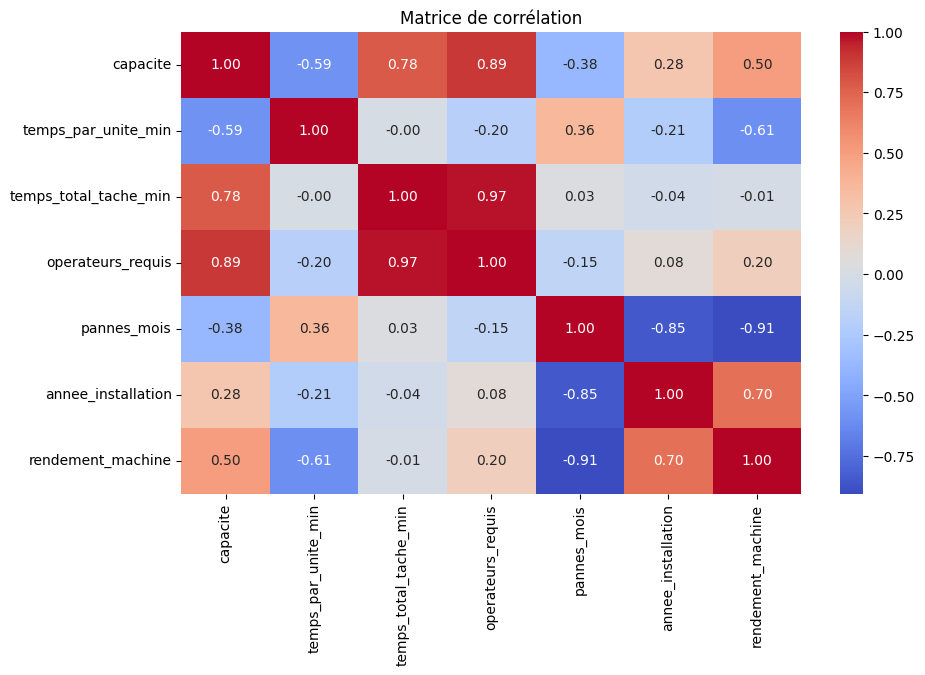


📊 Distribution des colonnes numériques :


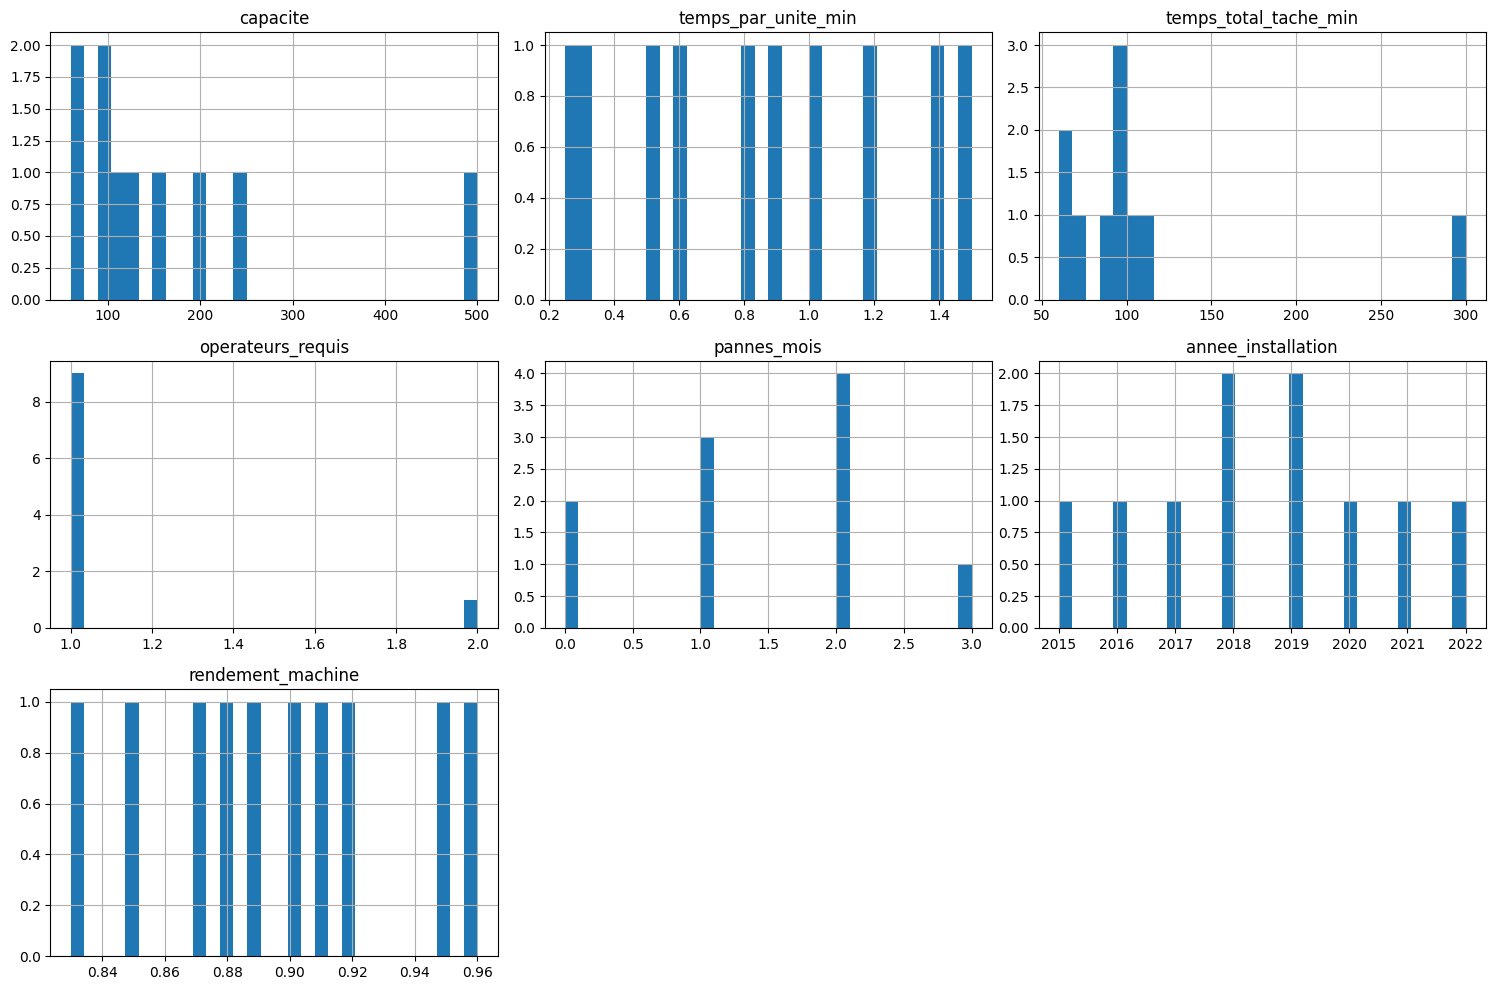

In [ ]:
EDA(df_logs)
EDA(df_rh)
EDA(df_machines)

In [ ]:

MACHINES_META = df_machines.set_index('machine_id').to_dict('index')
STD_DUR = {mid: MACHINES_META[mid]['temps_total_tache_min'] for mid in MACHINES_META}

print('='*55)
print('STATISTIQUES LOGS')
print('='*55)
print(df_logs[['task_duration_min','anomaly_flag']].describe().round(2))

print('\n--- Anomalies par machine ---')
anom_m = df_logs.groupby('machine_id')['anomaly_flag'].agg(
    nb_sessions='count', nb_anomalies='sum',
    taux_pct=lambda x: round(x.mean()*100, 2)
).sort_values('taux_pct', ascending=False)
print(anom_m)

print('\n--- Anomalies par shift ---')
print(df_logs.groupby('shift')['anomaly_flag'].agg(
    nb='count', taux_pct=lambda x: round(x.mean()*100, 2)
))

print('\n--- Statut présence RH ---')
print(df_rh['statut_presence'].value_counts())

print('\n--- Risques RH ---')
print(df_rh[['risque_absenteisme','risque_depart']].apply(pd.value_counts))

STATISTIQUES LOGS
       task_duration_min  anomaly_flag
count          159628.00     159628.00
mean               88.46          0.05
std                44.35          0.21
min                 6.00          0.00
25%                65.10          0.00
50%                81.80          0.00
75%               100.40          0.00
max               467.80          1.00

--- Anomalies par machine ---
            nb_sessions  nb_anomalies  taux_pct
machine_id                                     
M001               4390           244      5.56
M010              23061          1155      5.01
M003              12528           625      4.99
M008              29591          1411      4.77
M009              22799          1087      4.77
M005              12090           575      4.76
M002              16182           769      4.75
M007              12738           605      4.75
M004              12807           600      4.68
M006              13442           613      4.56

--- Anomalies par shift

/tmp/ipython-input-1444396343.py:25: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(df_rh[['risque_absenteisme','risque_depart']].apply(pd.value_counts))
/tmp/ipython-input-1444396343.py:25: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(df_rh[['risque_absenteisme','risque_depart']].apply(pd.value_counts))


/tmp/ipython-input-2725778382.py:28: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0,0,1,0.95])
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


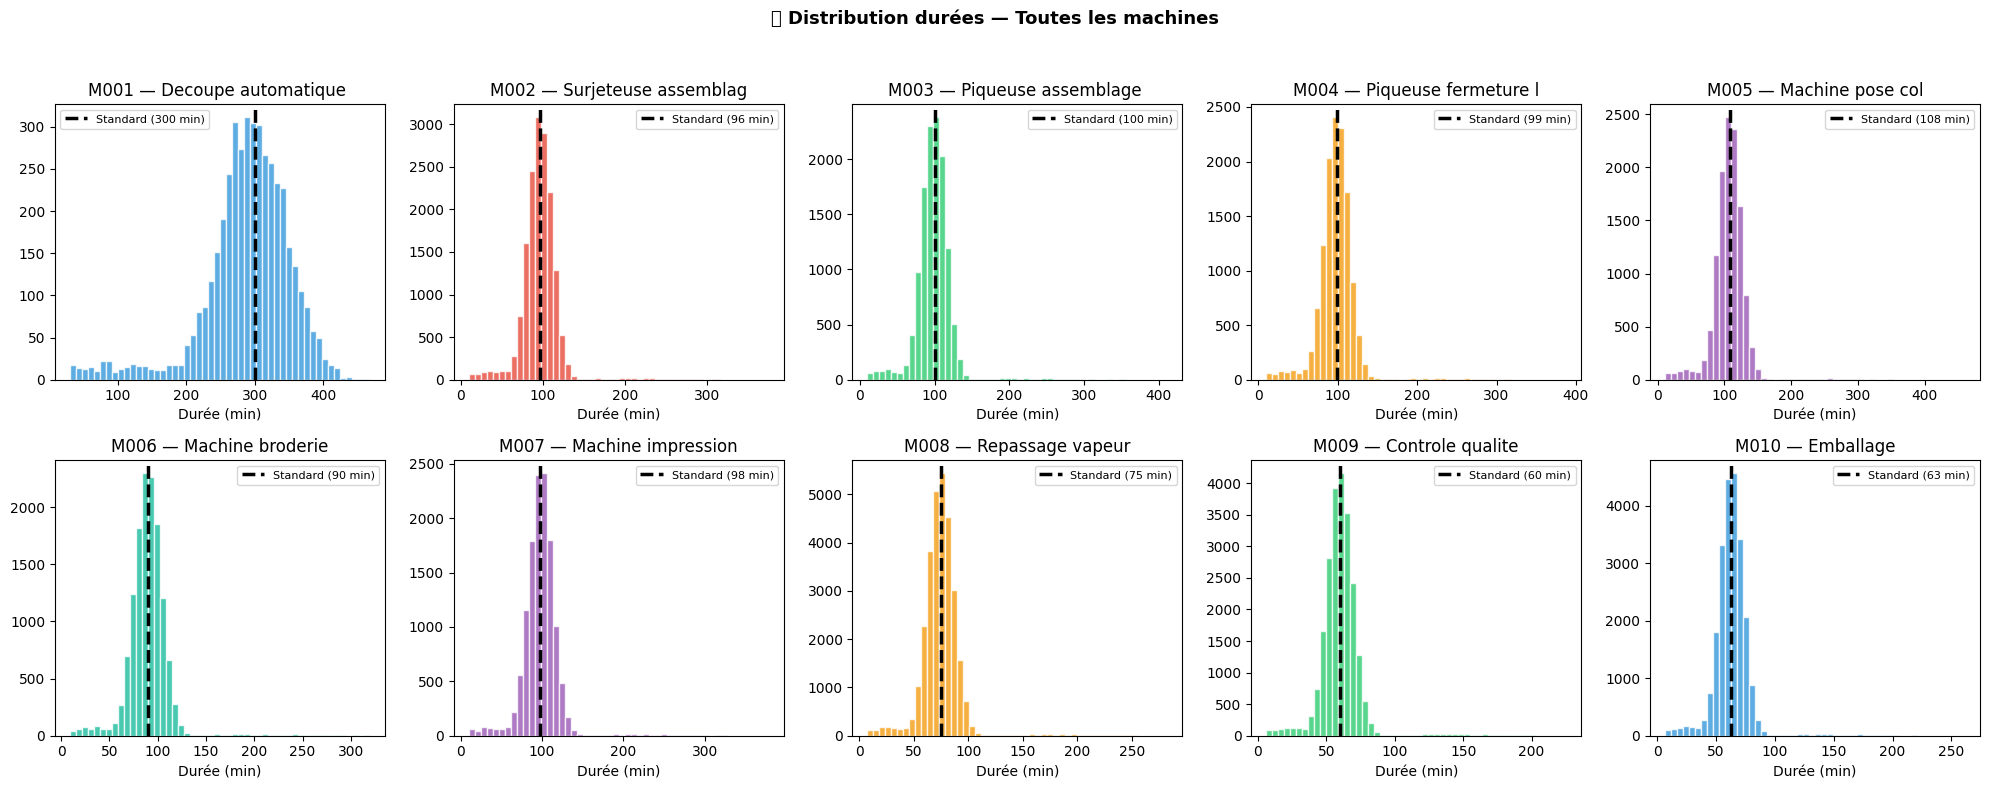

In [ ]:
# Liste de toutes les machines à afficher
machines_to_plot = ['M001','M002','M003','M004','M005','M006','M007','M008','M009','M010']
colors = ['#3498DB','#E74C3C','#2ECC71','#F39C12','#9B59B6','#1ABC9C','#9B59B6','#F39C12','#2ECC71','#3498DB']

# Création figure 2 lignes x 5 colonnes
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('📊 Distribution durées — Toutes les machines', fontsize=13, fontweight='bold')

for idx, mid in enumerate(machines_to_plot):
    row, col = divmod(idx, 5)  # trouve la position dans la grille
    ax = axes[row, col]

    if mid not in df_logs['machine_id'].values:
        ax.text(0.5, 0.5, 'Pas de données', ha='center', va='center')
        ax.set_title(mid)
        continue

    data = df_logs[df_logs['machine_id'] == mid]['task_duration_min'].dropna()
    std = STD_DUR.get(mid, 100)  # durée standard
    ax.hist(data, bins=50, color=colors[idx], alpha=0.8, edgecolor='white')
    ax.axvline(std, color='black', lw=2.5, ls='--', label=f'Standard ({std} min)')

    nom = MACHINES_META.get(mid, {}).get('nom_machine', mid)
    ax.set_title(f'{mid} — {nom[:20]}')
    ax.set_xlabel('Durée (min)')
    ax.legend(fontsize=8)

plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

Text(0.5, 0, 'Ancienneté (années)')

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)


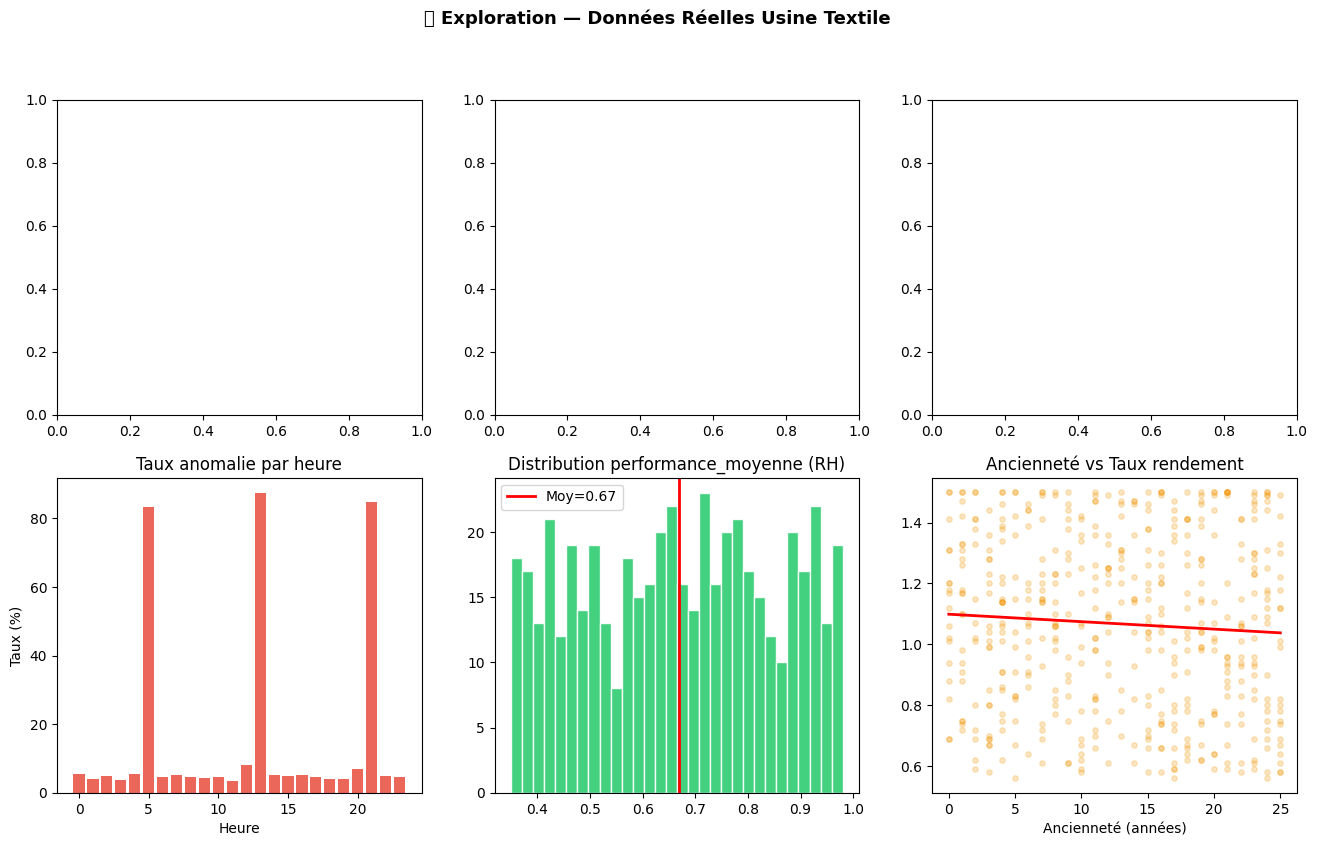

In [ ]:
# Visualisation exploratoire
fig, axes = plt.subplots(2, 3, figsize=(16, 9))
fig.suptitle('📊 Exploration — Données Réelles Usine Textile',
             fontsize=13, fontweight='bold')
colors = ['#3498DB','#E74C3C','#2ECC71','#F39C12','#9B59B6','#1ABC9C']

# Taux anomalie par heure
hourly = df_logs.groupby(df_logs['tag_event_start'].dt.hour)['anomaly_flag'].mean()*100
axes[1,0].bar(hourly.index, hourly.values, color='#E74C3C', alpha=0.85)
axes[1,0].set_title('Taux anomalie par heure')
axes[1,0].set_xlabel('Heure'); axes[1,0].set_ylabel('Taux (%)')

# Performance RH
axes[1,1].hist(df_rh['performance_moyenne'].dropna(), bins=30,
               color='#2ECC71', edgecolor='white', alpha=0.9)
axes[1,1].axvline(df_rh['performance_moyenne'].mean(), color='red',
                  lw=2, label=f'Moy={df_rh["performance_moyenne"].mean():.2f}')
axes[1,1].set_title('Distribution performance_moyenne (RH)')
axes[1,1].legend()

# Ancienneté vs taux_rendement
x = df_rh['anciennete_annees'].dropna()
y = df_rh['taux_rendement'].dropna()
idx_c = x.index.intersection(y.index)
axes[1,2].scatter(x[idx_c], y[idx_c], alpha=0.25, s=15, color='#F39C12')
z = np.polyfit(x[idx_c], y[idx_c], 1)
xline = np.linspace(0, 25, 100)
axes[1,2].plot(xline, np.poly1d(z)(xline), 'r-', lw=2)
axes[1,2].set_title('Ancienneté vs Taux rendement')
axes[1,2].set_xlabel('Ancienneté (années)')



In [ ]:
# Sélection colonnes RH disponibles
COLS_RH_DISPONIBLES = [c for c in [
    'employee_id','age','sexe','anciennete_annees','niveau_etude','poste',
    'departement','type_contrat','heures_absence_mois','retards_mois',
    'performance_moyenne','taux_rendement','accidents_travail',
    'maladies_professionnelles','evaluation_manager','risque_absenteisme',
    'risque_depart','shift_travail','nombre_enfants','etat_civil',
    'statut_presence','salaire_mensuel','prime_rendement',
    'heures_travail_semaine','jours_conge_restant',
] if c in df_rh.columns]

print(f'Colonnes RH sélectionnées ({len(COLS_RH_DISPONIBLES)}) :')
print(COLS_RH_DISPONIBLES)

# Join LEFT : garder TOUS les logs
df = df_logs.merge(df_rh[COLS_RH_DISPONIBLES], on='employee_id', how='left')

# Métadonnées machines
df['std_duration']      = df['machine_id'].map(STD_DUR)
df['machine_rendement'] = df['machine_id'].map(
    {mid: v['rendement_machine'] for mid,v in MACHINES_META.items()})
df['machine_pannes']    = df['machine_id'].map(
    {mid: v['pannes_mois'] for mid,v in MACHINES_META.items()})
df['machine_age']       = 2025 - df['machine_id'].map(
    {mid: v['annee_installation'] for mid,v in MACHINES_META.items()})
if 'atelier' in df_machines.columns:
    df['atelier'] = df['machine_id'].map(
        {mid: v.get('atelier','?') for mid,v in MACHINES_META.items()})

print(f'\n✅ Dataset enrichi : {df.shape}')
print(f'   Lignes   : {len(df):,}')
print(f'   Colonnes : {df.shape[1]}')
print(f'   Nulls RH : {df["performance_moyenne"].isna().sum()} (employee_id sans match RH)')

df[['log_id','employee_id','machine_id','task_duration_min',
    'std_duration','age','anciennete_annees','heures_absence_mois',
    'performance_moyenne','taux_rendement']].head(5)
df.head()

Colonnes RH sélectionnées (25) :
['employee_id', 'age', 'sexe', 'anciennete_annees', 'niveau_etude', 'poste', 'departement', 'type_contrat', 'heures_absence_mois', 'retards_mois', 'performance_moyenne', 'taux_rendement', 'accidents_travail', 'maladies_professionnelles', 'evaluation_manager', 'risque_absenteisme', 'risque_depart', 'shift_travail', 'nombre_enfants', 'etat_civil', 'statut_presence', 'salaire_mensuel', 'prime_rendement', 'heures_travail_semaine', 'jours_conge_restant']

✅ Dataset enrichi : (159628, 40)
   Lignes   : 159,628
   Colonnes : 40
   Nulls RH : 0 (employee_id sans match RH)


,log_id,employee_id,machine_id,task_name,tag_event_start,tag_event_end,task_duration_min,shift,product,task_status,...,statut_presence,salaire_mensuel,prime_rendement,heures_travail_semaine,jours_conge_restant,std_duration,machine_rendement,machine_pannes,machine_age,atelier
0,L000001,E005,M001,Decoupe lot complet,2025-01-01 06:11:00,2025-01-01 10:25:18,254.3,Matin,T-Shirt_Sport,Completee,...,En_travail,1050,469,48,25,300,0.92,1,6,Preparation
1,L000002,E021,M001,Decoupe lot complet,2025-01-01 06:08:00,2025-01-01 10:07:54,239.9,Matin,Chemise_Formelle,Completee,...,En_conge,980,406,43,22,300,0.92,1,6,Preparation
2,L000003,E047,M001,Decoupe lot complet,2025-01-01 06:02:00,2025-01-01 08:22:54,140.9,Matin,Chemise_Formelle,Completee,...,En_conge,910,86,44,18,300,0.92,1,6,Preparation
3,L000004,E047,M001,Decoupe lot complet,2025-01-01 08:27:54,2025-01-01 12:01:24,213.5,Matin,Chemise_Formelle,Completee,...,En_conge,910,86,44,18,300,0.92,1,6,Preparation
4,L000005,E036,M001,Decoupe lot complet,2025-01-01 06:12:00,2025-01-01 09:08:30,176.5,Matin,Polo_Premium,Completee,...,En_travail,700,353,44,25,300,0.92,1,6,Preparation


In [ ]:
# ── 5A. Temporelles ─────────────────────────────────────
df['hour']        = df['tag_event_start'].dt.hour
df['day_of_week'] = df['tag_event_start'].dt.dayofweek
df['week']        = df['tag_event_start'].dt.isocalendar().week.astype(int)
df['is_monday']   = (df['day_of_week'] == 0).astype(int)
df['is_friday']   = (df['day_of_week'] == 4).astype(int)
df['shift_enc']   = df['shift'].map(
    {'Matin':0,'Jour':1,'ApresMidi':2,'Nuit':3}).fillna(1).astype(int)

# ── 5B. Durée (normalisation par machine) ───────────────
df['duration_ratio']     = df['task_duration_min'] / (df['std_duration'] + 1e-8)
df['duration_deviation'] = df['task_duration_min'] - df['std_duration']
df['duration_abs_dev']   = np.abs(df['duration_deviation'])

mach_stats = df.groupby('machine_id')['task_duration_min'].agg(
    machine_mean='mean', machine_std='std').reset_index()
df = df.merge(mach_stats, on='machine_id', how='left')
df['machine_std']     = df['machine_std'].fillna(1.0)
df['machine_z_score'] = ((df['task_duration_min'] - df['machine_mean'])
                          / (df['machine_std'] + 1e-8))

# ── 5C. Profil individuel (rupture comportement) ─────────
emp_stats = df.groupby('employee_id')['duration_ratio'].agg(
    emp_mean_ratio='mean', emp_std_ratio='std', emp_task_count='count'
).reset_index()
df = df.merge(emp_stats, on='employee_id', how='left')
df['emp_std_ratio'] = df['emp_std_ratio'].fillna(0.1)
df['emp_deviation'] = df['duration_ratio'] - df['emp_mean_ratio']

print('✅ 5A-5C : temporelles + durée + profil employé')
print(f'   duration_ratio : [{df["duration_ratio"].min():.2f}, {df["duration_ratio"].max():.2f}]')
print(f'   machine_z_score: [{df["machine_z_score"].min():.2f}, {df["machine_z_score"].max():.2f}]')

✅ 5A-5C : temporelles + durée + profil employé
   duration_ratio : [0.10, 4.26]
   machine_z_score: [-3.98, 13.50]


In [ ]:
# ── 5D. Features RH (les plus précieuses) ───────────────────────────

# ── Encodage catégorielles RH ────────────────────────────────────────
df['risque_abs_enc'] = df['risque_absenteisme'].map(
    {'Faible':0,'Moyen':1,'Eleve':2}).fillna(1)
df['risque_dep_enc'] = df['risque_depart'].map(
    {'Faible':0,'Moyen':1,'Eleve':2}).fillna(1)
df['contrat_enc']    = df['type_contrat'].map(
    {'Journalier':0,'CDD':1,'CDI':2}).fillna(1)
df['sexe_enc']       = df['sexe'].map({'H':0,'F':1}).fillna(0)
df['niveau_enc']     = df['niveau_etude'].map(
    {'Aucun':0,'Primaire':1,'Secondaire':2,'Bac':3,'Licence':4,'Master':5}).fillna(2)

# ── Composantes du fatigue_score ─────────────────────────────────────

# 1. Stress lié à la situation civile
#    Divorcé = charge solo élevée | Célibataire = moyen | Marié = stable
df['etat_civil_stress'] = df['etat_civil'].map(
    {'Divorce':1.0, 'Celibataire':0.5, 'Marie':0.2}
).fillna(0.5)

# 2. Vulnérabilité liée à l'âge
#    < 25 ans  : inexpérience, instabilité émotionnelle
#    30-45 ans : zone de stabilité maximale
#    > 55 ans  : fatigue physique, résistance au changement
def age_vulnerability(age):
    if   age < 25: return 1.0
    elif age < 30: return 0.6
    elif age < 45: return 0.2
    elif age < 55: return 0.4
    else:          return 0.8

df['age_vulnerability'] = df['age'].fillna(35).apply(age_vulnerability)

# 3. Charge familiale : plus d'enfants = plus de contraintes et d'absences potentielles
#    Normalisé sur 5 (max observé dans tes données)
df['charge_familiale'] = (df['nombre_enfants'].fillna(0) / 5).clip(0, 1)

# ── fatigue_score final — 6 composantes ──────────────────────────────
#
#  Composante              Poids   Justification
#  ──────────────────────────────────────────────
#  heures_absence_mois     0.25    signal direct d'absence
#  retards_mois            0.25    signal direct de désengagement
#  accidents_travail       0.15    inattention / stress physique
#  charge_familiale        0.15    contraintes vie personnelle
#  etat_civil_stress       0.10    contexte psychosocial
#  age_vulnerability       0.10    fragilité liée à l'âge
#
df['fatigue_score'] = (
    df['heures_absence_mois'].fillna(0) / 40  * 0.25 +
    df['retards_mois'].fillna(0)        / 20  * 0.25 +
    (df['accidents_travail'].fillna(0) > 0).astype(int) * 0.15 +
    df['charge_familiale']                              * 0.15 +
    df['etat_civil_stress']                             * 0.10 +
    df['age_vulnerability']                             * 0.10
).clip(0, 1)

# ── Index de risque RH global ─────────────────────────────────────────
df['employee_risk_index'] = (
    df['risque_abs_enc']              * 0.4 +
    df['risque_dep_enc']              * 0.3 +
    df['accidents_travail'].fillna(0) / 5   * 0.3
)

# ── Écart entre perf RH déclarée et perf mesurée logs ────────────────
df['taux_rendement_filled'] = df['taux_rendement'].fillna(1.0)
df['ecart_rh_logs']         = np.abs(df['taux_rendement_filled'] - df['duration_ratio'])

# ── Cohérence shift (RH vs log réel) ─────────────────────────────────
if 'shift_travail' in df.columns:
    shift_norm = {'Matin':'matin','Jour':'jour','ApresMidi':'aprem',
                  'Nuit':'nuit','Rotation':'rot'}
    df['shift_rh_n']     = df['shift_travail'].map(shift_norm).fillna('?')
    df['shift_log_n']    = df['shift'].map(shift_norm).fillna('?')
    df['shift_coherent'] = (df['shift_rh_n'] == df['shift_log_n']).astype(int)
else:
    df['shift_coherent'] = 1

# ── Vérification ─────────────────────────────────────────────────────
print('✅ 5D : features RH créées')
print(f'   fatigue_score moyen          : {df["fatigue_score"].mean():.3f}')
print(f'   fatigue_score max            : {df["fatigue_score"].max():.3f}')
print(f'     dont absences contrib.     : {(df["heures_absence_mois"].fillna(0)/40*0.25).mean():.3f}')
print(f'     dont charge familiale      : {df["charge_familiale"].mean()*0.15:.3f}')
print(f'     dont âge vulnérabilité     : {df["age_vulnerability"].mean()*0.10:.3f}')
print(f'     dont état civil stress     : {df["etat_civil_stress"].mean()*0.10:.3f}')
print(f'   employee_risk_index moyen    : {df["employee_risk_index"].mean():.3f}')
print(f'   Incohérences shift           : {(df["shift_coherent"]==0).sum():,}')
print(f'   Ecart RH/logs moyen          : {df["ecart_rh_logs"].mean():.3f}')

✅ 5D : features RH créées
   fatigue_score moyen          : 0.505
   fatigue_score max            : 0.807
     dont absences contrib.     : 0.125
     dont charge familiale      : 0.037
     dont âge vulnérabilité     : 0.046
     dont état civil stress     : 0.044
   employee_risk_index moyen    : 0.869
   Incohérences shift           : 151,271
   Ecart RH/logs moyen          : 0.306


In [ ]:
# ==========================================
# 1️⃣ EXTRACTION DES FEATURES
# ==========================================

FEATURES_ANOMALIE = [
    'task_duration_min',
    'duration_ratio',
    'duration_deviation',
    'duration_abs_dev',
    'machine_z_score',
    'emp_deviation',
    'machine_rendement',
    'machine_pannes',
    'machine_age',
    'product_enc',
    'status_enc',
    'emp_std_ratio',
    'emp_task_count'
]

# Garder uniquement les colonnes existantes
FEATURES_ANOMALIE = [c for c in FEATURES_ANOMALIE if c in df.columns]

# Conversion numérique + nettoyage
X = df[FEATURES_ANOMALIE].apply(pd.to_numeric, errors='coerce')
X = X.fillna(X.median())

# Target (si existante)
y = df['anomaly_flag']

print("✅ Features utilisées :", FEATURES_ANOMALIE)
print("Shape X :", X.shape)

✅ Features utilisées : ['task_duration_min', 'duration_ratio', 'duration_deviation', 'duration_abs_dev', 'machine_z_score', 'emp_deviation', 'machine_rendement', 'machine_pannes', 'machine_age', 'emp_std_ratio', 'emp_task_count']
Shape X : (159628, 11)


In [ ]:
# ==========================================
# 2️⃣ TRAIN TEST SPLIT
# ==========================================

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape :", X_train.shape)
print("Test shape  :", X_test.shape)

Train shape : (127702, 11)
Test shape  : (31926, 11)


In [ ]:
# ==========================================
# 3️⃣ ISOLATION FOREST
# ==========================================

from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

iso = IsolationForest(
    n_estimators=300,
    contamination=0.05,
    random_state=42
)

iso.fit(X_train)

# Prédiction sur test
y_pred_iso = iso.predict(X_test)
y_pred_iso = pd.Series(y_pred_iso).map({1:0, -1:1})

print("===== ISOLATION FOREST =====")
print(confusion_matrix(y_test, y_pred_iso))
print(classification_report(y_test, y_pred_iso))

===== ISOLATION FOREST =====
[[29994   395]
 [  314  1223]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     30389
           1       0.76      0.80      0.78      1537

    accuracy                           0.98     31926
   macro avg       0.87      0.89      0.88     31926
weighted avg       0.98      0.98      0.98     31926



In [ ]:
# Calcul du ratio de classes
n_maj = (y_train == 0).sum()
n_min = (y_train == 1).sum()
scale_pos_weight = n_maj / n_min  # pour XGBoost
print("Scale pos weight :", scale_pos_weight)

Scale pos weight : 19.774686839108508


In [ ]:
# ==========================================
# 4️⃣ RANDOM FOREST
# ==========================================

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=10,
    class_weight='balanced',  # <-- gère le déséquilibre
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("===== RANDOM FOREST =====")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

===== RANDOM FOREST =====
[[30155   234]
 [   31  1506]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     30389
           1       0.87      0.98      0.92      1537

    accuracy                           0.99     31926
   macro avg       0.93      0.99      0.96     31926
weighted avg       0.99      0.99      0.99     31926



In [ ]:
# ==========================================
# 5️⃣ XGBOOST
# ==========================================

from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight  # <-- corrige le déséquilibre
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("===== XGBOOST =====")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

===== XGBOOST =====
[[30162   227]
 [   34  1503]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     30389
           1       0.87      0.98      0.92      1537

    accuracy                           0.99     31926
   macro avg       0.93      0.99      0.96     31926
weighted avg       0.99      0.99      0.99     31926



In [ ]:
import joblib

In [ ]:
# Random Forest
joblib.dump(rf, 'rf_model.joblib')

# XGBoost
joblib.dump(xgb, 'xgb_model.joblib')

# Isolation Forest
joblib.dump(iso, 'if_model.joblib')

['if_model.joblib']